# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

Описание данных
- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов
- ceiling_height — высота потолков (м)
- cityCenters_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- first_day_exposition — дата публикации
- floor — этаж
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- last_price — цена на момент снятия с публикации
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- open_plan — свободная планировка (булев тип)
- parks_around3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)
- rooms — число комнат
- studio — квартира-студия (булев тип)
- total_area — общая площадь квартиры в квадратных метрах (м²)
- total_images — число фотографий квартиры в объявлении

### Откройте файл с данными и изучите общую информацию. 

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# читаем файл с данными, присваиваем переменную data
data = pd.read_csv('/datasets/real_estate_data.csv')

Выведем первые 10 строк, чтобы посмотреть какие данные хранятся в файле

In [2]:
data.head(10)

,total_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0,20\t13000000.0\t108.0\t2019-03-07T00:00:00\t3\...
1,7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t\t...
2,10\t5196000.0\t56.0\t2015-08-20T00:00:00\t2\t\...
3,0\t64900000.0\t159.0\t2015-07-24T00:00:00\t3\t...
4,2\t10000000.0\t100.0\t2018-06-19T00:00:00\t2\t...
5,10\t2890000.0\t30.4\t2018-09-10T00:00:00\t1\t\...
6,6\t3700000.0\t37.3\t2017-11-02T00:00:00\t1\t\t...
7,5\t7915000.0\t71.6\t2019-04-18T00:00:00\t2\t\t...
8,20\t2900000.0\t33.16\t2018-05-23T00:00:00\t1\t...
9,18\t5400000.0\t61.0\t2017-02-26T00:00:00\t3\t2...


Для корректного отображения необходимо указать разделитель при чтении файла.

In [5]:
# разделитель указываем в атрибуте sep
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Теперь таблица стала читаемой и пригодной для обработки.

Посмотрим общую информацию с помощью метода info()

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Построим гистограммы по столбцам датафрейма:

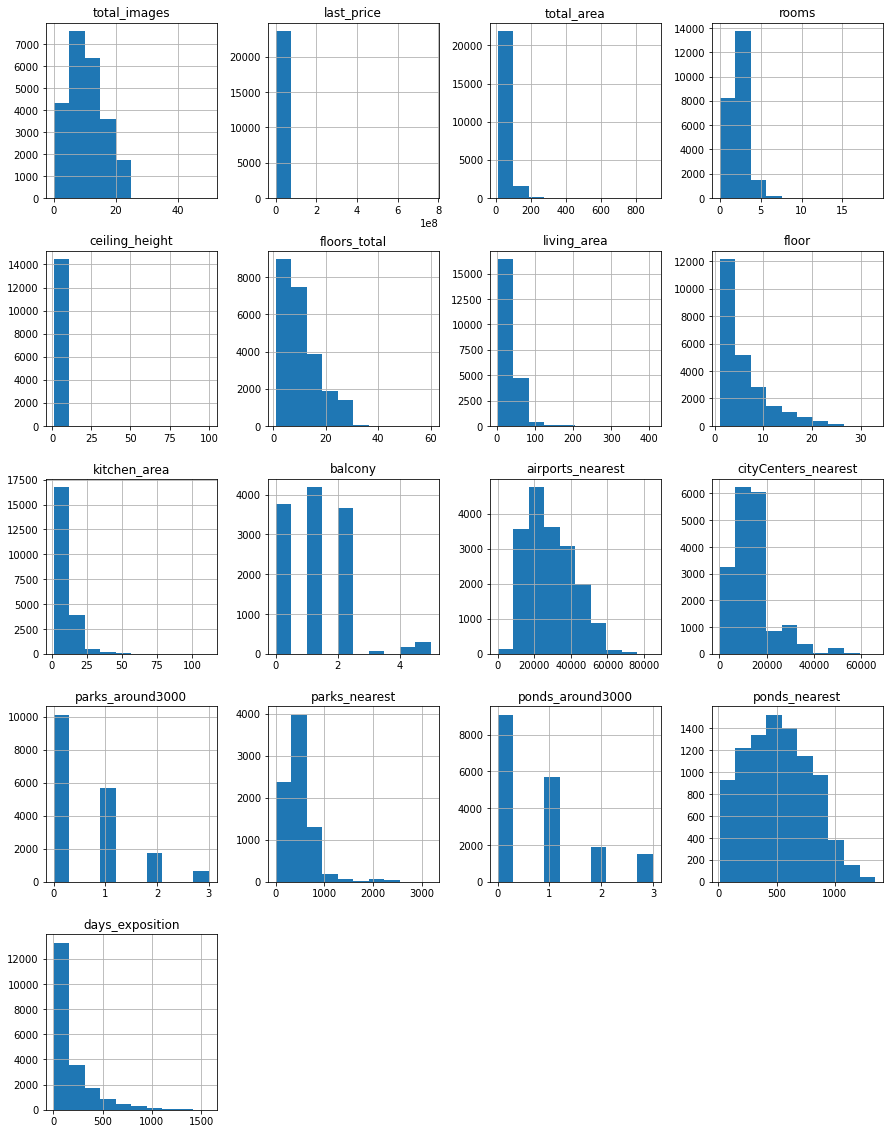

In [6]:
data.hist(figsize=(15, 20));

***Вывод:*** По информации о датасете видим наличие пропущенных значений в 14 столбцах, несоответствие типов данных и фактические значения (is_apartment должен иметь тип bool, first_day_exposition должен иметь тип datetime и ряд столбцов с целыми числами должны иметь тип int). Гистограммы, благодаря наличию значений выбивающихся из общей массы указывают о наличии выбросов.

Подробнее по каждой сложности с датасетом и по каждому столбцу разберем в предобработке данных.

### Предобработка данных

#### Корректировка названий столбцов

В информации о таблице замечаем столбцы, написанные не по правилам, заменим названия столбцов:

In [6]:
data = data.rename(
    columns={'cityCenters_nearest': 'city_сenters_nearest',
                           'parks_around3000': 'parks_around_3000',
                           'ponds_around3000': 'ponds_around_3000'}
)

Для проверки выведем названия столбцов:

In [7]:
data.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around_3000', 'parks_nearest', 'ponds_around_3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

#### Работа с пропусками

Выводим количество пропущенных значений для каждого столбца:

In [8]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around_3000        5518
parks_nearest           15620
ponds_around_3000        5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Для определения метода работы с пропусками изучим столбцы с пропусками и их значения: 

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
- balcony — число балконов 
- ceiling_height — высота потолков (м)
- city_centers_nearest — расстояние до центра города (м)
- days_exposition — сколько дней было размещено объявление (от публикации до снятия)
- floors_total — всего этажей в доме
- is_apartment — апартаменты (булев тип)
- kitchen_area — площадь кухни в квадратных метрах (м²)
- living_area — жилая площадь в квадратных метрах (м²)
- locality_name — название населённого пункта
- parks_around_3000 — число парков в радиусе 3 км
- parks_nearest — расстояние до ближайшего парка (м)
- ponds_around_3000 — число водоёмов в радиусе 3 км
- ponds_nearest — расстояние до ближайшего водоёма (м)


Число балконов, число парков, число водоемов заменим на нули (пустые данные в этих столбцах могут свидетельствовать об отсутствии той или иной характеристики) 

Апартаменты заменим на False (пустые данные могут означать, что объект не является апартаментами)




In [9]:
# Заменим пропуски методом fillna()
data['balcony'] = data['balcony'].fillna(0)
data['parks_around_3000'] = data['parks_around_3000'].fillna(0)
data['ponds_around_3000'] = data['ponds_around_3000'].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False)
# в качестве проверки веведем количество пропусков в обработанных столбцах 
print(data['balcony'].isna().sum())
print(data['parks_around_3000'].isna().sum())
print(data['ponds_around_3000'].isna().sum())
print(data['is_apartment'].isna().sum())

0
0
0
0


Остальные пропуски оставим незаполненными, нет возможности получить максимально приближенные к действительности данные.

#### Изменение типов данных

Снова взглянем на данные о столбцах:

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          23699 non-null  bool   
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

***last_price*** хранит целые числа, сменим тип на int

In [11]:
# Меняем тип данных с помощью метода astype()
data['last_price'] = data['last_price'].astype('int64')
# Проверяем успешность вызовом .dtype
data['last_price'].dtype

dtype('int64')

***first_day_exposition*** хранит даты, но имеет тип object, исправим на datetime, что в дальнейшем позволит работать с этим столбцом 

In [12]:
# Меняем тип данных с помощью метода pd.to_datetime() и указываем необходимый формат
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
# Проверяем успешность вызовом .dtype
data['first_day_exposition'].dtype

dtype('<M8[ns]')

***floors_total*** хранит целые числа, сменим тип на int

In [13]:
# Меняем тип данных с помощью метода astype()
data['floors_total'] = data['floors_total'].astype('Int8')
# Проверяем успешность вызовом .dtype
data['floors_total'].dtype

Int8Dtype()

***balcony*** хранит целые числа, сменим тип на int

In [14]:
# Меняем тип данных с помощью метода astype()
data['balcony'] = data['balcony'].astype('Int8')
# Проверяем успешность вызовом .dtype
data['balcony'].dtype

Int8Dtype()

***parks_around_3000*** хранит целые числа, сменим тип на int

In [15]:
# Меняем тип данных с помощью метода astype()
data['parks_around_3000'] = data['parks_around_3000'].astype('Int8')
# Проверяем успешность вызовом .dtype
data['parks_around_3000'].dtype

Int8Dtype()

***ponds_around_3000*** хранит целые числа, сменим тип на int

In [16]:
# Меняем тип данных с помощью метода astype()
data['ponds_around_3000'] = data['ponds_around_3000'].astype('Int8')
# Проверяем успешность вызовом .dtype
data['ponds_around_3000'].dtype

Int8Dtype()

***days_exposition*** хранит целые числа, сменим тип на int

In [17]:
# Меняем тип данных с помощью метода astype(), для обхода ошибки используем np.floor()
data['days_exposition'] = np.floor(pd.to_numeric(data['days_exposition'], errors='coerce')).astype('Int64')
# Проверяем успешность вызовом .dtype
data['days_exposition'].dtype

Int64Dtype()

#### Работа с дубликатами

Дубликаты в нашей таблице могут храниться только в столбце с названием населенного пункта locality_name, так как именно там находится текст и его можно написать по-разному. Так же в таблице нет никаких идентификаторов и т.п., поэтому явных дубликатов быть не может. 

Посмотрим на уникальные значения в столбце locality_name:

In [18]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [19]:
data['locality_name'].value_counts()

Санкт-Петербург                  15721
посёлок Мурино                     522
посёлок Шушары                     440
Всеволожск                         398
Пушкин                             369
                                 ...  
деревня Раздолье                     1
посёлок Пансионат Зелёный Бор        1
поселок Возрождение                  1
деревня Каськово                     1
поселок Тёсово-4                     1
Name: locality_name, Length: 364, dtype: int64

Названия населенных пунктов записаны по-разному.

Буква ё пишется как е

Поселок городского типа может быть и селом, и деревней, и городским поселком

Некоторые местоположения вовсе не имеют типа населенного пункта

Лучше удалить типы населенного пункта и оставить только названия:

In [20]:
# Создаем список с тем, что необходимо удалить (чтобы не было лишних пробелов после ставим пробел)
for_delete = ['поселок ', 'посёлок ', 'городского типа ', 'городской ',  'деревня ', 
                'коттеджный ', 'село ', 'при железнодорожной станции ',
                'станции ', 'садоводческое некоммерческое товарищество ', 'садовое товарищество ']
# Перезаписываем столбец с удалением значений из списка с помощью метода replace()
for t in for_delete:
    data['locality_name'] = data['locality_name'].str.replace(t, '')
    
data['locality_name'].value_counts()    

Санкт-Петербург    15721
Мурино               590
Кудрово              472
Шушары               440
Всеволожск           398
                   ...  
Кирпичное              1
Трубников Бор          1
Пикколово              1
Лужайка                1
Борисова Грива         1
Name: locality_name, Length: 305, dtype: int64

Количество уникальных значений уменьшилось на 59.
Проверим есть ли в названиях населенных пунктов буква ё:

In [21]:
data['locality_name'].str.contains('ё').sum()

65

С первого взгляда дубликатов с различием в написании ё нет, но на всякий случай заменим все ё на е:

In [22]:
data['locality_name'] = data['locality_name'].str.replace('ё', 'е')
data['locality_name'].str.contains('ё').sum()

0

In [23]:
# Проверим не осталось ли типов населенных пунктов
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

#### Работа с выбросами

Методом describe() посмотрим на распределение данных в датафрейме:

In [7]:
pd.options.display.float_format = '{:,.1f}'.format
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.0","23,699.0","23,699.0","23,699.0","14,504.0","23,613.0","21,796.0","23,699.0","21,421.0","12,180.0","18,157.0","18,180.0","18,181.0","8,079.0","18,181.0","9,110.0","20,518.0"
mean,9.9,"6,541,548.8",60.3,2.1,2.8,10.7,34.5,5.9,10.6,1.2,"28,793.7","14,191.3",0.6,490.8,0.8,518.0,180.9
std,5.7,"10,887,013.3",35.7,1.1,1.3,6.6,22.0,4.9,5.9,1.1,"12,630.9","8,608.4",0.8,342.3,0.9,277.7,219.7
min,0.0,"12,190.0",12.0,0.0,1.0,1.0,2.0,1.0,1.3,0.0,0.0,181.0,0.0,1.0,0.0,13.0,1.0
25%,6.0,"3,400,000.0",40.0,1.0,2.5,5.0,18.6,2.0,7.0,0.0,"18,585.0","9,238.0",0.0,288.0,0.0,294.0,45.0
50%,9.0,"4,650,000.0",52.0,2.0,2.6,9.0,30.0,4.0,9.1,1.0,"26,726.0","13,098.5",0.0,455.0,1.0,502.0,95.0
75%,14.0,"6,800,000.0",69.9,3.0,2.8,16.0,42.3,8.0,12.0,2.0,"37,273.0","16,293.0",1.0,612.0,1.0,729.0,232.0
max,50.0,"763,000,000.0",900.0,19.0,100.0,60.0,409.7,33.0,112.0,5.0,"84,869.0","65,968.0",3.0,"3,190.0",3.0,"1,344.0","1,580.0"


***last_price***

В столбце last_price минимальная стоимость квартиры составляет всего лишь 12.190, а максимальное 763.000.000. Если это и правда, то таких квартир мало. Посмотрим на количество данных о квартирах с стоимостью меньше 100.000 и больше 100.000.000

In [25]:
# Методами query() count() считаем количество заданных строк 
print(data.query('last_price < 100000')['last_price'].count())
print(data.query('last_price > 100000000')['last_price'].count())

1
37


Таких исключительных квартир немного, для чистоты исследования удалим их. 

In [26]:
# Методами drop() query() удаляем необходимые строки
data.drop(index=data.query('last_price < 100000').index, inplace=True)
data.drop(index=data.query('last_price > 100000000').index, inplace=True)
# Проверяем успех
print(data.query('last_price < 100000')['last_price'].count())
print(data.query('last_price > 100000000')['last_price'].count())

0
0


***total_area***

В данных о площади максимальным значением является 900 квадратных метра, многовато, стоит посмотреть распределение данных на графике:

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

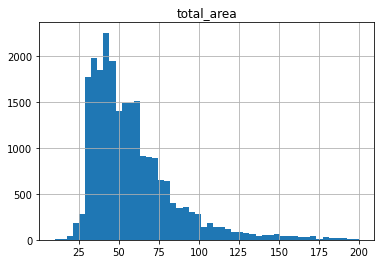

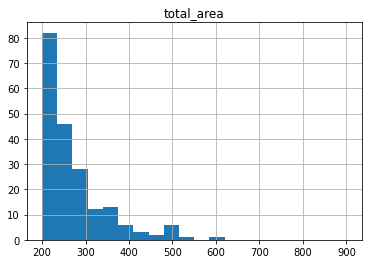

In [27]:
# Методом hist() строим гистограмму 
data.hist('total_area', bins=50, range=(10, 200))
data.hist('total_area', bins=20, range=(200, 900))

После 500 квадратов значений сравнительно меньше, их и отбросим:

In [28]:
# Методами drop() query() удаляем необходимые строки
data.drop(index=data.query('total_area > 500').index, inplace=True)
# Проверяем успех
data.query('total_area > 500')['total_area'].count()

0

***rooms***

Максимальное число комнат 19, вполне реалистично, но есть невозможные нулевые значения. Делаем предположение, что это студии или квартиры со свободной планировкой. Выведем количество квартир без комнат, которые не являются студией или квартирой со свободной планировкой и количество без комнат, которые являются таковыми:

In [29]:
print(data.query('rooms == 0 and ~studio and ~open_plan')['rooms'].count())
print(data.query('rooms == 0 and (studio or open_plan)')['rooms'].count())

0
197


Так как комнатами могут являться только жилые помещения, такие как спальня или гостиная, а вышеуказанные также выполняют функцию кухни, то оставим эти значения на нуле.

Рассмотрим максимальные значения количества комнат:

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

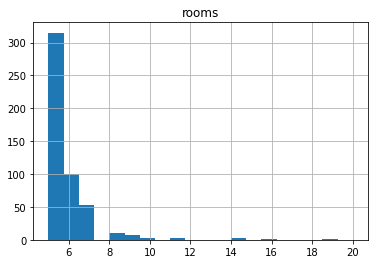

In [30]:
data.hist('rooms', bins=20, range=(5, 20))

<AxesSubplot:>

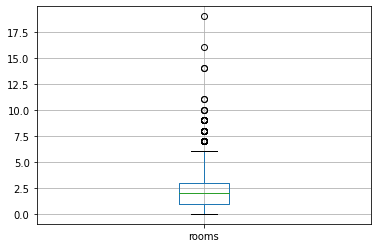

In [31]:
data.boxplot(['rooms'])

По графику видим, что значения больше семи являются выбросами и их немного, избавимся от них:

In [32]:
# Методами drop() query() удаляем необходимые строки
data.drop(index=data.query('rooms > 7').index, inplace=True)
# Проверяем успех
data.query('rooms > 7')['rooms'].count()

0

***ceiling_height***

И минимальное и максимальное значения высоты потолка (1 и 100) совсем неправдоподобны.

Согласно данным из гугла минимальной высотой потолка является 2,4 метра

Значения от 24 до 36 явно записаны не в метрах, а в дециметрах, разделим данные значения на 10:

In [33]:
data.update(data[(data['ceiling_height'] >= 24) & (data['ceiling_height'] <= 36)]['ceiling_height']/10)

Посмотрим на распределение минимальных значений:

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

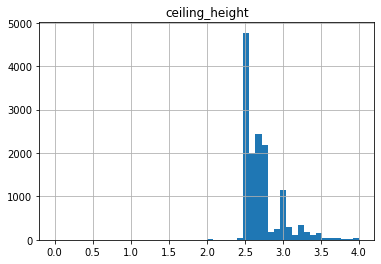

In [34]:
data.hist('ceiling_height', bins=50, range=(0, 4))

Значений ниже выбранного порога крайне мало, удалим их:

In [35]:
# Методами drop() query() удаляем необходимые строки
data.drop(index=data.query('ceiling_height < 2.4').index,inplace=True)
# Проверяем успех
data.query('ceiling_height < 2.4')['ceiling_height'].count()

0

Рассмотрим значения выше 3

194

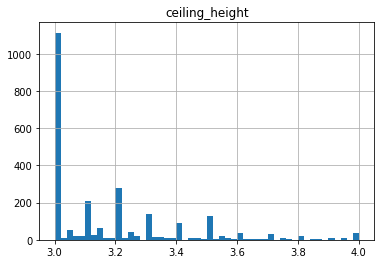

In [36]:
data.hist('ceiling_height', bins=50, range=(3, 4))
data.query('ceiling_height > 3.6')['ceiling_height'].count()

Значений выше 3.6 меньше и это уже достаточно высокий потолок, удаляем:

In [37]:
# Методами drop() query() удаляем необходимые строки
data.drop(index=data.query('ceiling_height > 3.6').index,inplace=True)
# Проверяем успех
data.query('ceiling_height > 3.6')['ceiling_height'].count()

0

***floors_total***

Минимальное значение в один этаж нас совершенно устраивает, такое бывает, но максимальное в 60 это уже много и не похоже на правду. По общему выводу об информации в интернете делаем вывод, что жилых домов более 30 этажей нет.

<AxesSubplot:>

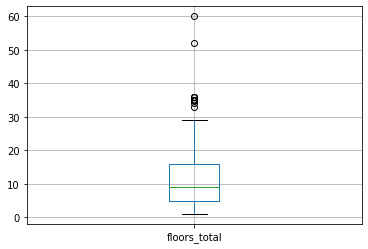

In [38]:
data.boxplot('floors_total')

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

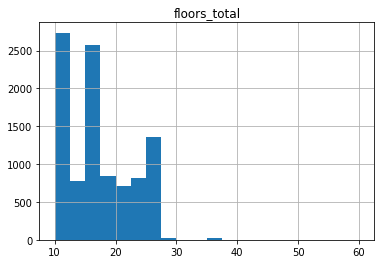

In [39]:
data.hist('floors_total', bins=20, range=(10, 60))

График только доказал наш вывод, значения больше 30 удаляем:

In [40]:
# Методами drop() query() удаляем необходимые строки
data.drop(index=data.query('floors_total > 30').index,inplace=True)
# Проверяем успех
data.query('floors_total > 30')['floors_total'].count()

0

***living_area***

Минимальной жилой площадью является 1 квадратный метр, а максимальный 409

Посмотрим распределение минимальных значений:

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

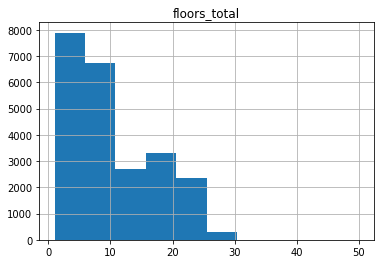

In [41]:
data.hist('floors_total', bins=10, range=(1, 50))

Видим, что есть площади меньше 10 квадратных метра. Хоть согласно ст 105 ЖК РФ минимальной площадью является 6 квадратных метров, для нашего проекта возьмем значение 10. Посчитаем количество квартир меньше 10 квадратных метров:

In [42]:
data.query('living_area < 10')['living_area'].count()

25

Всего 25 строк, немного, удаляем:

In [43]:
# Методами drop() query() удаляем необходимые строки
data.drop(index=data.query('living_area < 10').index,inplace=True)
# Проверяем успех
data.query('living_area < 10')['living_area'].count()

0

С помощью диаграммы размаха посмотрим выбросы:

(80.0, 500.0)

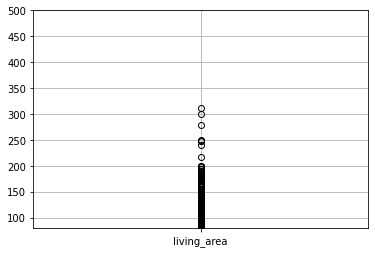

In [44]:
data.boxplot(['living_area'])
plt.ylim(80, 500)

По диаграмме видим, что выбросов со значениями больше 200 намного меньше. Посчитаем количество строк, где жилая площадь дольше 200

In [45]:
data.query('living_area > 200')['living_area'].count()

8

Выходит 14 выбросов, которые можем и удалить:

In [46]:
# Методами drop() query() удаляем необходимые строки
data.drop(index=data.query('living_area > 200').index,inplace=True)
# Проверяем успех
data.query('living_area > 200')['living_area'].count()

0

Во избежание логических ошибок проверим есть ли квартиры, где жилая площадь больше общей:

In [47]:
data.query('living_area > total_area')['living_area'].count()

0

***floor***

Логические ошибки не нужны, проверяем есть ли строки, где этаж больше общего количества этажей:

In [48]:
data.query('floor > floors_total')['floor'].count()

0

Ни минимальное, ни максимальное (ранее удаляли строки, где общее количество этажей больше 30), не кажутся неестественными, так же в отношении этажа, думаю, выбросы вполне логичны и могут не удаляться, тем более их достаточно много.

902

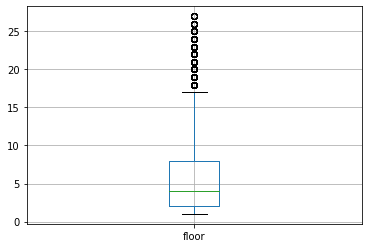

In [49]:
data.boxplot(['floor'])
data.query('floor > 17')['floor'].count()

***kitchen_area***

Минимальные и максимальные значения снова создают атмосферу фантастики, 1 и 112 квадратных метров соответственно. Нужно посмотреть поближе на распределения в этих зонах:

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

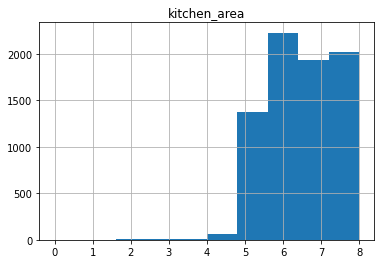

In [50]:
data.hist('kitchen_area', bins=10, range=(0, 8))

In [51]:
data.query('kitchen_area < 4')['kitchen_area'].count()

28

Меньше всего значений с площадью кухни менее 4 квадратных метра, по старым правилом именно этот метраж был минимальным, данные строки удаляем:

In [52]:
# Методами drop() query() удаляем необходимые строки
data.drop(index=data.query('kitchen_area < 4').index,inplace=True)
# Проверяем успех
data.query('kitchen_area < 4')['kitchen_area'].count()

0

Посмотрим на больше значения площади:

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

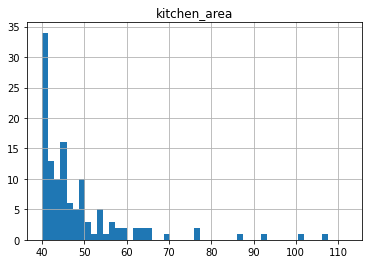

In [53]:
data.hist('kitchen_area', bins=50, range=(40, 112))

In [54]:
data.query('kitchen_area > 50')['kitchen_area'].count()

30

Значений больше 50 квадратных метров минимально, строки с такими квартирами тоже удалим:

In [55]:
# Методами drop() query() удаляем необходимые строки
data.drop(index=data.query('kitchen_area > 50').index,inplace=True)
# Проверяем успех
data.query('kitchen_area > 50')['kitchen_area'].count()

0

Промеряем нет ли квартир, где площадь кухни больше общей:

In [56]:
data.query('kitchen_area > total_area')['living_area'].count()

0

***balcony***

Балконы сомнений не взывают.

array([[<AxesSubplot:title={'center':'balcony'}>]], dtype=object)

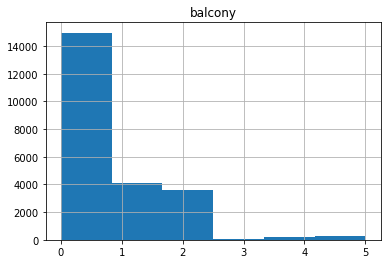

In [57]:
data.hist('balcony', bins=6)

***days_exposition***

Проверим распределение и количество нулевых значений:

0

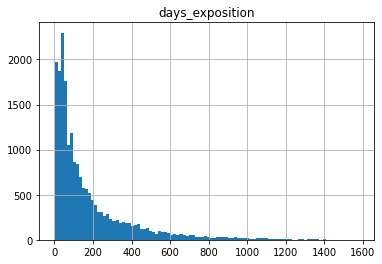

In [58]:
data.hist('days_exposition', bins=100)
data.query('days_exposition == 0')['days_exposition'].count()

Максимальное количество дней 1580, что довольно много, за такое время цены практически точно изменились, необходимо удалить слишком старые объявления.

160

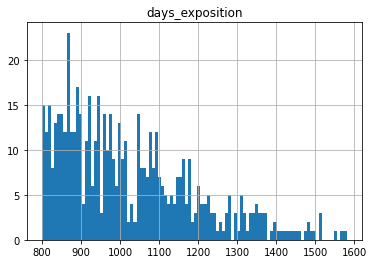

In [59]:
data.hist('days_exposition', bins=100, range=(800, 1580))
data.query('days_exposition > 1100')['days_exposition'].count()

Значений больше 1100 меньше, их и удалим:

In [60]:
# Методами drop() query() удаляем необходимые строки
data.drop(index=data.query('days_exposition > 1100').index,inplace=True)
# Проверяем успех
data.query('days_exposition > 1100')['days_exposition'].count()

0

In [61]:
# После удаления строк необходимо сбросить индексы
data.reset_index(drop=True,inplace=True)

***Прочее***

Остальные данные в столбцах airports_nearest, city_сenters_nearest,	parks_around_3000,	parks_nearest,	ponds_around_3000,	ponds_nearest являются картографическими и нет возможности выявить несоответствия с действительностью, по гистограммам из первого шага выглядят вполне разумно. 

#### Итоги

***Работа с пропусками***

Проставлены нули, так как пропуски могут означать отсутствие той или иной характеристики:
- balcony — число балконов
- parks_around_3000 — число парков в радиусе 3 км
- ponds_around_3000 — число водоёмов в радиусе 3 км

Проставлено значение False, так как пропуски свидетельствуют о том, что квартира не является апартаментами и в столбце булев тип:
- is_apartment — апартаменты (булев тип)

Прочие данные заменить на более-менее логичные значения не представляется возможным.

Причины появления пропусков:
- Данные не заполнены ввиду отсутствия характеристики
- Сбой при выгрузки картографических данных

***Замена типов данных***

Тип данных с целочисленными значениями изменен на int

Тип в столбце first_day_exposition изменен на datetime для возможности работать с датами.

***Работа с дубликатами***

В столбце locality_name удалены типы населенных пунктов, оставили только сами названия и все буквы "ё" заменили на "е".

***Работа с выбросами***

Выполнены следующие изменения:

- last_price удалены объявления со стоимостью менее 100.000 и более 100.000.000
- total_area удалены объявления с метражом более 500
- rooms удалены объявления с более 7 комнатами
- ceiling_height дециметры переведены в метры, удалены объявления с высотой потолка меньше 2,4 и больше 3,6
- floors_total удалены объявления с количеством этажей в доме более 30
- living_area проверили не является ли жилая площадь больше общей, удалены объявления со значениями меньше 10 и больше 200
- floor проверили не указан ли этаж больше, чем всего в доме, объявления не удаляли
- kitchen_area удалили объявления с площадью кухни менее 4 и более 50
- balcony объявления не удаляли
- days_exposition - удалили слишком старые объявления со значениями более 1100



### Посчитайте и добавьте в таблицу новые столбцы

***Цена одного квадратного метра***

In [62]:
data['square_price'] = data['last_price'] / data['total_area']
data['square_price'] = data['square_price'].round(2)

***День недели публикации объявления***

In [63]:
data['day_week'] = data['first_day_exposition'].dt.weekday

***Месяц публикации объявления***

In [64]:
data['month'] = data['first_day_exposition'].dt.month

***Год публикации объявления***

In [65]:
data['year'] = data['first_day_exposition'].dt.year

***Tип этажа квартиры***

In [66]:
data['floor_type'] = data['floor']
data['floor_type'] = data['floor_type'].where(data['floors_total'] / data['floor_type'] != 1, 'Последний')
data['floor_type'] = data['floor_type'].where(data['floor_type'] != 1, 'Первый')
data['floor_type'] = data['floor_type'].where((data['floor_type'] == 'Последний') | (data['floor_type'] == 'Первый'), 'Другой')

***Расстояние до центра города в километрах***

In [67]:
data['city_centers_nearest_km'] = data['city_сenters_nearest'] / 1000
data['city_centers_nearest_km'] = data['city_centers_nearest_km'].round().astype('Int8')
data['city_centers_nearest_km'].head()

0    16
1    19
2    14
3     7
4     8
Name: city_centers_nearest_km, dtype: Int8

In [68]:
data[['square_price', 'day_week', 'month', 'year', 'floor_type', 'city_centers_nearest_km']].head(10)

,square_price,day_week,month,year,floor_type,city_centers_nearest_km
0,120370.37,3,3,2019,Другой,16
1,82920.79,1,12,2018,Первый,19
2,92785.71,3,8,2015,Другой,14
3,408176.10,4,7,2015,Другой,7
4,100000.00,1,6,2018,Другой,8
5,95065.79,0,9,2018,Другой,<NA>
6,99195.71,3,11,2017,Другой,19
7,110544.69,3,4,2019,Другой,12
8,87454.76,2,5,2018,Другой,<NA>
9,88524.59,6,2,2017,Другой,15


### Проведите исследовательский анализ данных



#### Изучение параметров объектов

Посмотрим основную информацию по данным:

In [69]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,square_price,day_week,month,year,city_centers_nearest_km
count,23134.000000,2.313400e+04,23134.000000,23134.000000,14054.000000,23051.000000,21267.000000,23134.000000,20897.000000,23134.000000,...,23134.000000,7763.000000,23134.000000,8759.000000,20028.000000,23134.000000,23134.000000,23134.000000,23134.000000,17669.000000
mean,9.847757,6.061720e+06,58.836423,2.043486,2.706853,10.700881,33.583293,5.898807,10.348832,0.595271,...,0.457681,491.132423,0.575819,522.524946,171.324046,97905.569139,2.573917,6.399758,2017.387049,14.315185
std,5.665604,5.854608e+06,30.009015,1.014746,0.228506,6.535525,18.851317,4.866577,5.089431,0.961173,...,0.737262,340.633555,0.870028,276.695808,197.314631,41896.018846,1.791046,3.487266,1.019847,8.555634
min,0.000000,4.300000e+05,12.000000,0.000000,2.400000,1.000000,10.000000,1.000000,4.000000,0.000000,...,0.000000,1.000000,0.000000,13.000000,1.000000,7962.960000,0.000000,1.000000,2014.000000,0.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,18.600000,2.000000,7.000000,0.000000,...,0.000000,288.000000,0.000000,302.500000,44.000000,76301.172500,1.000000,3.000000,2017.000000,10.000000
50%,9.000000,4.600000e+06,51.700000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,...,0.000000,455.000000,0.000000,506.000000,93.000000,94666.670000,3.000000,6.000000,2017.000000,13.000000
75%,14.000000,6.650000e+06,68.700000,3.000000,2.800000,16.000000,42.000000,8.000000,11.900000,1.000000,...,1.000000,613.000000,1.000000,733.000000,224.000000,113517.047500,4.000000,10.000000,2018.000000,16.000000
max,50.000000,9.900000e+07,494.100000,7.000000,3.600000,29.000000,200.000000,27.000000,50.000000,5.000000,...,3.000000,3190.000000,3.000000,1344.000000,1100.000000,848484.850000,6.000000,12.000000,2019.000000,66.000000


Строим гистограммы по следующим данным:

- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

***total_area***

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

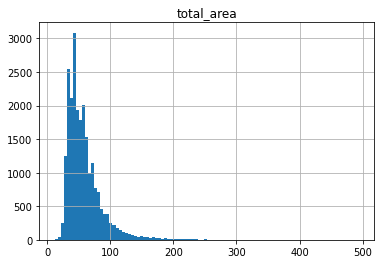

In [70]:
data.hist('total_area', bins=100)

<AxesSubplot:>

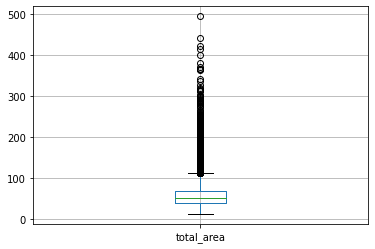

In [71]:
data.boxplot(['total_area'])

***Вывод:*** По графикам наблюдаем, что количество квартир больше 100 квадратных метров меньше, а значительно меньше квартир с площадью больше 300 квадратных метра.

***living_area***

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

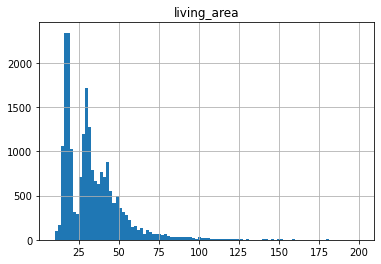

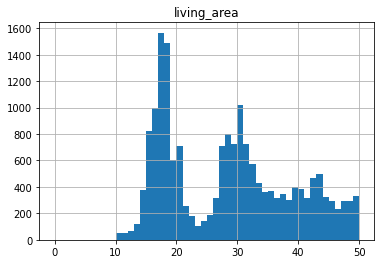

In [72]:
data.hist('living_area', bins=100)
data.hist('living_area', bins=50, range=(0, 50))

***Вывод:*** Видим постепенно снижение количества квартир после отметки в 50 квадратных метра жилой площади. Так же есть заметное снижение количества квартир около 23 квадратов.

***kitchen_area***

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

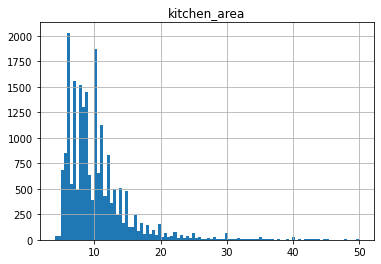

In [73]:
data.hist('kitchen_area', bins=100)

***Вывод:*** График выглядит как почти идеальное распределение Пуассона - хороший знак.

***last_price***

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

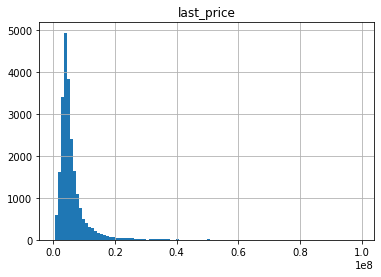

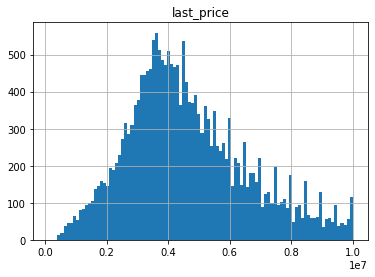

In [74]:
data.hist('last_price', bins=100)
data.hist('last_price', bins=100, range=(100000, 10000000))

***Вывод:*** Достаточно хороший график. Есть немного квартир с достаточно большой стоимостью, что в свою очередь связано с общей площадью.

***rooms***

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

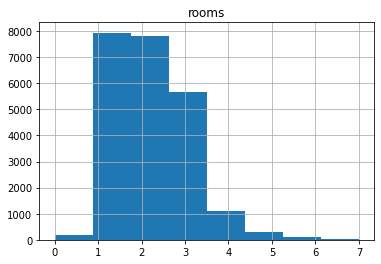

In [75]:
data.hist('rooms', bins=8)

***Вывод:*** Большая часть квартир с количеством комнат от 1 до 3, выглядит реально и логично.

***ceiling_height***

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

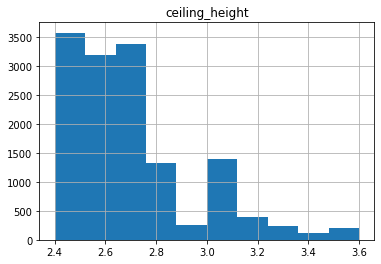

In [76]:
data.hist('ceiling_height', bins=10)

***Вывод:*** Большая часть квартир с высотой потолков 2.4 - 2.6, так же почти на среднем уровне высота 3.0, а между - заметный спад.

***floor***

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

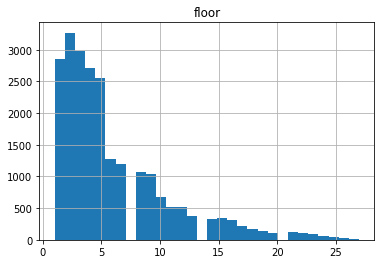

In [77]:
data.hist('floor', bins=30)

***Вывод:*** Больше всего квартир на невысоких этажах до пятого включительно, что связано с распределением общего количества этажей в домах.

***floor_type***

<AxesSubplot:xlabel='floor_type'>

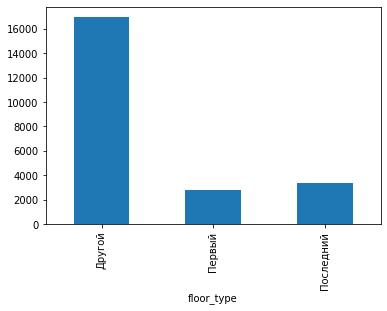

In [78]:
data.groupby('floor_type')['floor_type'].count().plot(kind='bar')

***Вывод:*** Больше всего квартир находятся не на первом и не на последнем этажах, что логично, ведь количество таких этажей больше, если учесть, что домов с двумя этажами мало.

***floors_total***

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

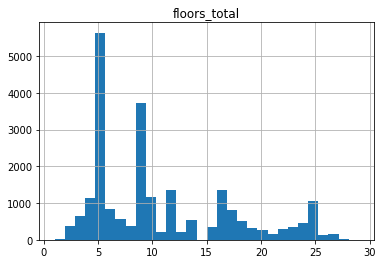

In [79]:
data.hist('floors_total', bins=30)

***Вывод:*** Есть заметные пики на отметках в 5 и 9 этажей, неудивительно, ведь это самые распространенные этажности. Так же есть пики в многоэтажках, предполагаю, что это новостройки в пригороде, многоэтажек там много.

***city_сenters_nearest***

array([[<AxesSubplot:title={'center':'city_сenters_nearest'}>]],
      dtype=object)

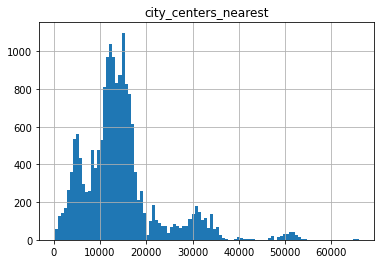

In [80]:
data.hist('city_сenters_nearest', bins=100)

***Вывод:*** Видим постепенное снижение количество квартир в зависимости от удаленности от центра, думаю и плотность самих квартир меньше при удалении от центра. Так же есть пики около 5 и 10 км. 

***airports_nearest***

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

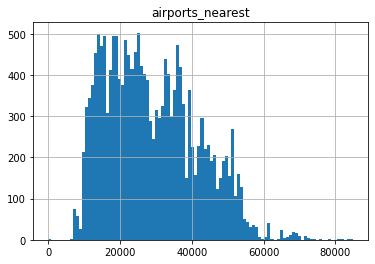

In [81]:
data.hist('airports_nearest', bins=100)

***Вывод:*** Есть еле заметное снижение количества квартир по удалению от аэропорта. Достаточно много пиков и спадов.

***parks_nearest***

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

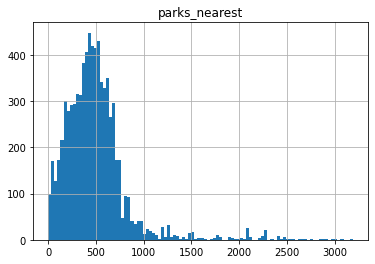

In [82]:
data.hist('parks_nearest', bins=100)

***Вывод:*** Большая часть квартир находится в непосредственной близости к парку, есть резкий спад после примерно 750 метров.

***day_week,	month***

array([[<AxesSubplot:title={'center':'month'}>]], dtype=object)

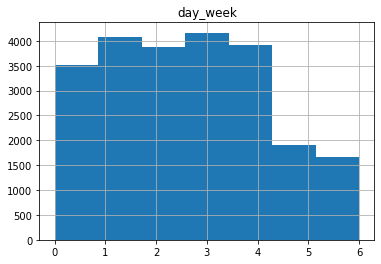

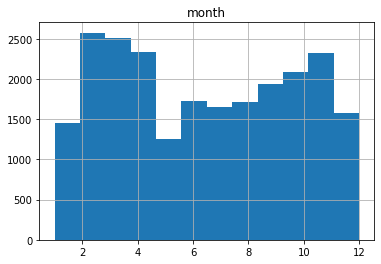

In [83]:
data.hist('day_week', bins=7)
data.hist('month', bins=12)

***Вывод:*** Чаще всего объявления публикуются в будние дни. Так же наибольшую активность в продаже проявляют с февраля по апрель, с июня по ноябрь активность постепенно набирает обороты, но с небольшим спадом в июле.

#### Изучение скорости продажи квартиры

Количество дней, которое объявление было открыто хранит столбец days_exposition, построим для него гистограмму, посчитаем среднее и медиану:

Среднее количество дней: 171.32404633513082
Медиана количества дней: 93.0


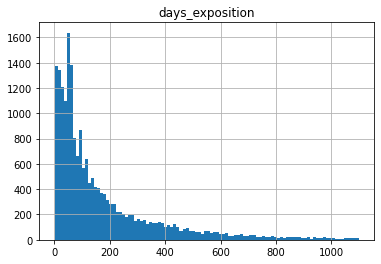

In [84]:
data.hist('days_exposition', bins=100)
print('Среднее количество дней:', data['days_exposition'].mean())
print('Медиана количества дней:', data['days_exposition'].median())

График имеет плавное снижение по мере увеличения количества дней, то есть большая часть объявлений закрывают быстро.

Можем заметить, что есть весомая разница между средним и медианой. Так как выбросы особо не влияют на медиану, то вероятно они присутствуют в данных.

<AxesSubplot:>

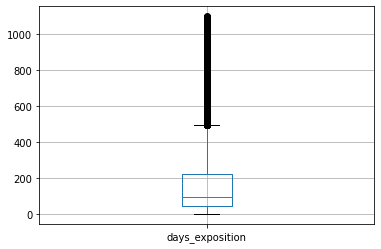

In [85]:
data.boxplot(['days_exposition'])

Действительно, выбросы есть и их достаточно много после отметки в 500 дней. Думаю, эти квартиры являются исключениями и по той или иной причине их не могут продать, а может быть забыли вовремя снять объявление.

Так как нас интересует среднестатистическая продажа, то для выяснения скорости продажи квартиры отбросим эти исключения и посчитаем среднее и медиану:

In [86]:
print('Среднее количество дней 2.0:', data.query('days_exposition < 500')['days_exposition'].mean())
print('Медиана количества дней 2.0:', data.query('days_exposition < 500')['days_exposition'].median())

Среднее количество дней 2.0: 126.58041125541125
Медиана количества дней 2.0: 84.0


Разница между значениями снизилась. 

Из вышеуказанного я бы сделал следующие выводы:
- Быстрой считается продажа до 84 дней
- Долгой можем назвать продажу выше 170 дней
- В среднем продажа занимает от 84 до 93 дней

#### Изучение факторов, которые влияют на общую стоимость квартиры

Проведем исследование зависимостей по следующим факторам:

- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год)

Сначала посмотрим на корреляцию между факторами:

In [87]:
col_factor = ['last_price', 'total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type', 'day_week', 'month', 'year']
data[col_factor].corr().head(1)

,last_price,total_area,living_area,kitchen_area,rooms,day_week,month,year
last_price,1.0,0.753682,0.661305,0.56046,0.454565,-0.000726,0.007455,-0.039327


Согласно корреляции больше всего влияния на общую стоимость имеют (по убыванию):
- общая площадь
- жилая площадь
- площадь кухни

Разберем каждый критерий отдельно:

***total_area***

<AxesSubplot:xlabel='last_price', ylabel='total_area'>

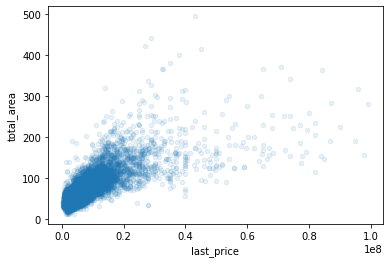

In [88]:
data.plot(x='last_price', y='total_area', kind='scatter', alpha=0.1)

***Вывод:*** Общая площадь влияет на стоимость квартиры в положительную сторону.

***living_area***

<AxesSubplot:xlabel='last_price', ylabel='living_area'>

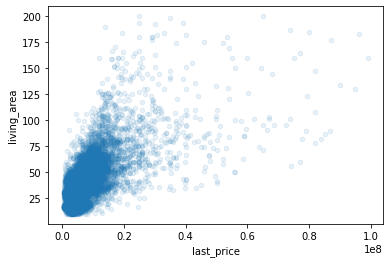

In [89]:
data.plot(x='last_price', y='living_area', kind='scatter', alpha=0.1)

***Вывод:*** Жилая площадь влияет на стоимость квартиры в положительную сторону.

***kitchen_area***

<AxesSubplot:xlabel='last_price', ylabel='kitchen_area'>

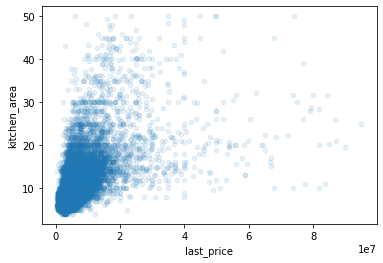

In [90]:
data.plot(x='last_price', y='kitchen_area', kind='scatter', alpha=0.1)

***Вывод:*** Жилая площадь влияет на стоимость квартиры в положительную сторону.

***rooms***

<AxesSubplot:xlabel='rooms'>

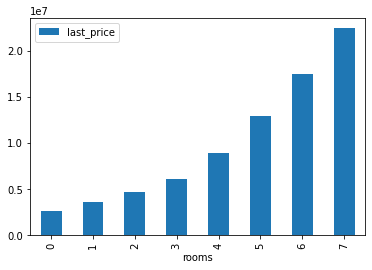

In [91]:
data.pivot_table(index='rooms',values='last_price', aggfunc='median').plot(y='last_price', kind='bar')

***Вывод:*** По графику видим абсолютный рост по мере увеличения числа комнат. Однако это может быть связано и с увеличенным метражом.

***floor_type***

<AxesSubplot:xlabel='floor_type'>

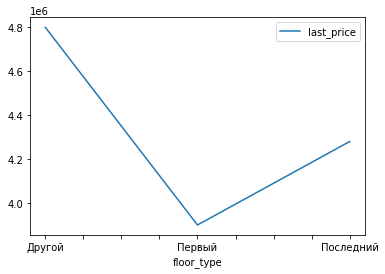

In [92]:
data.pivot_table(index='floor_type',values='last_price', aggfunc='median').plot(y='last_price', kind='line')

***Вывод:*** Корреляции нет, но можем сделать вывод, что стоимость значительно ниже у первого этажа, выше у последнего, а наибольшей стоимостью обладают этажи между первым и последним.

***day_week***

<AxesSubplot:xlabel='day_week'>

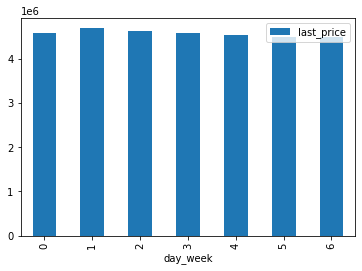

In [93]:
data.pivot_table(index='day_week',values='last_price', aggfunc='median').plot(y='last_price', kind='bar')

***Вывод:*** Цена объекта не зависит от дня недели, все показатели примерно на одном уровне.

***month***

<AxesSubplot:xlabel='month'>

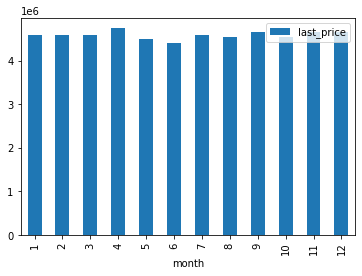

In [94]:
data.pivot_table(index='month',values='last_price', aggfunc='median').plot(y='last_price', kind='bar')

***Вывод:*** Цена объекта не зависит от месяца, все показатели примерно на одном уровне.

***year***

<AxesSubplot:xlabel='year'>

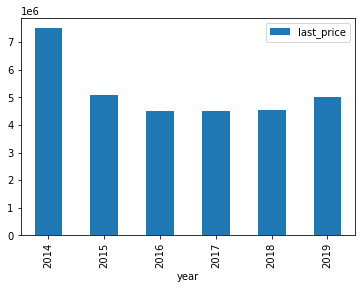

In [95]:
data.pivot_table(index='year',values='last_price', aggfunc='median').plot(y='last_price', kind='bar')

***Вывод:*** Наблюдается скачек в 2014 году, но зависимость не прослеживается.

***Итоги:***

Положительная корреляция наблюдается у критериев:
- Общая площадь
- Площадь кухни
- Количество комнат

Цена не зависит от даты размещения. 
Есть не корреляционная зависимость (скорее логическая): цены на квартиры ниже на первых этажах, чуть выше у последних и наибольше цены имеют квартиры на других этажах. 

#### Изучение средней стоимости одного квадратного метра по населенным пунктам

Найдем населенные пункты с наибольшим количеством объявлений:

In [96]:
top_locality = data.pivot_table(index='locality_name', values='square_price', aggfunc=('count', 'mean'))
top_locality = top_locality.sort_values(by='count', ascending=False).head(10)
top_locality = top_locality.reset_index().rename(columns = {'index':'locality_name'}).sort_values(by='mean', ascending=False)
top_locality = top_locality[['locality_name', 'mean']].reset_index(drop=True)
top_locality

,locality_name,mean
0,Санкт-Петербург,112886.311025
1,Пушкин,102656.462669
2,Кудрово,95316.489638
3,Парголово,90103.136411
4,Мурино,86049.932205
5,Шушары,78512.185573
6,Колпино,75310.766905
7,Гатчина,68799.627549
8,Всеволожск,68637.171374
9,Выборг,58189.318571


Выведем населенные пункты с наибольшей и наименьшей стоимостью:

In [97]:
top_locality.query('mean == mean.max() or mean == mean.min()')

,locality_name,mean
0,Санкт-Петербург,112886.311025
9,Выборг,58189.318571


Дополнительно хотел бы посмотреть на населенные пункты с меньшими средними стоимостями одного квадратного метра:

In [98]:
notop_locality = data.pivot_table(index='locality_name', values='square_price', aggfunc=('count', 'mean'))
notop_locality = notop_locality.sort_values(by='count', ascending=True).head(10)
notop_locality = notop_locality.reset_index().rename(columns = {'index':'locality_name'}).sort_values(by='mean', ascending=True)
notop_locality = notop_locality[['locality_name', 'mean']].reset_index(drop=True)
notop_locality

,locality_name,mean
0,Сижно,13709.68
1,Лесная Поляна,22580.65
2,Куровицы,22593.32
3,Кондратьево,25000.00
4,Курковицы,25606.47
5,Семиозерье,35714.29
6,Кривко,36619.72
7,Снегиревка,48575.31
8,Лаврики,51551.48
9,Левашово,96997.69


#### Исследование зависимости стоимости от расстояния до центра по Санкт-Петербургу

Для выяснения зависимости визуализируем как удаленность влияет на среднюю цену квартиры:

Text(0, 0.5, 'Средняя стоимость')

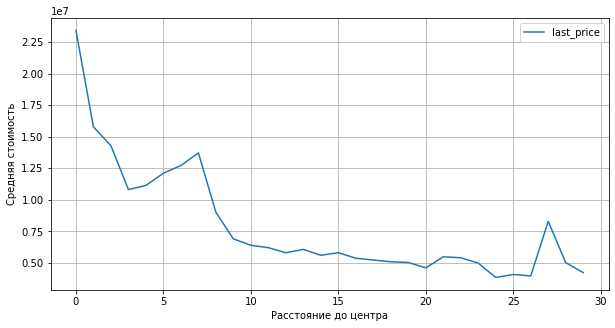

In [99]:
(
data[data['locality_name']=='Санкт-Петербург'].
    pivot_table(index='city_centers_nearest_km', 
                values='last_price', aggfunc='mean').plot(kind='line', grid=True, figsize=(10, 5))
)    
plt.xlabel('Расстояние до центра')
plt.ylabel('Средняя стоимость')

***Вывод:*** По графику видим, что стоимость действительно зависит от приближения к центру, тем не менее есть пик около 27 км, согласно топу населенных пунктов по стоимости квартир именно на этом расстоянии могут располагаться следующие населенные пункты после Санкт-Петербурга.

Посчитаем среднюю стоимость километра в Санкт-Петербурге:

In [100]:
mean_km = data.query('locality_name == "Санкт-Петербург"')['last_price'].mean() / data.query('locality_name == "Санкт-Петербург"')['city_centers_nearest_km'].mean()
mean_km.round(2)

629382.68

### Общий вывод

1. ***Предобработка данных***

   1.1 ***Работа с пропусками***
   
   Число балконов, число парков, число водоемов заменили на нули (пустые данные в этих столбцах могут свидетельствовать об отсутствии той или иной характеристики)
   
   Апартаменты заменили на False (пустые данные могут означать, что объект не является апартаментами)
   
   Остальные пропуски оставили незаполненными, нет возможности получить максимально приближенные к действительности данные.
   
   1.2 ***Изменение типов данных***
   
   В столбцах, которые содержали целые числа, но имели тип float заменили тип на int 
   first_day_exposition содержит дату и время, заменили тип на datetime, так как это позволяет обрабатывать данные, именно это позволило создать другие столбцы с днем недели, месяцев и годом.
   
   1.3 ***Работа с дубликатами***
   
   В столбце locality_name удалили тип населенного пункта, оставив только сами названия, все "ё" заменили на "е"
   
   1.4 ***Работа с выбросами***
   
   Выполнены следующие изменения:

   - last_price удалены объявления со стоимостью менее 100.000 и более 100.000.000;
   - total_area удалены объявления с метражом более 500;
   - rooms удалены объявления с более 7 комнатами;
   - ceiling_height дециметры переведены в метры, удалены объявления с высотой потолка меньше 2,4 и больше 3,6;
   - floors_total удалены объявления с количеством этажей в доме более 30;
   - living_area проверили не является ли жилая площадь больше общей, удалены объявления со значениями меньше 10 и больше 200;
   - floor проверили не указан ли этаж больше, чем всего в доме, объявления не удаляли;
   - kitchen_area удалили объявления с площадью кухни менее 4 и более 50;
   - balcony объявления не удаляли;
   - days_exposition - удалили слишком старые объявления со значениями более 1100.
   
   
2. ***Добавление данных***
   
   Для дальнейшего исследования добавили столбцы со следующими данными:
   - цена одного квадратного метра;
   - день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
   - месяц публикации объявления;
   - год публикации объявления;
   - тип этажа квартиры (значения — «первый», «последний», «другой»);
   - расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
   
   
3. ***Исследование данных***

   3.1 ***Изучение параметров объектов***
   
   В ходе изучения сделаны следующие выводы:
   - количество квартир больше 100 квадратных метров меньше, а значительно меньше квартир с площадью больше 300 квадратных метра. Большая часть квартир имеет метраж примерно от 30 до 60 квадратных метра;
   - есть постепенное снижение количества квартир после отметки в 50 квадратных метра жилой площади. Так же есть заметное снижение количества квартир около 23 квадратов;
   - график распределения по площади кухни имеет плавное снижение по мере увеличения площади;
   - распределение по общей стоимости хорошее, так же есть и объявления с достаточно высокой стоимостью, что в свою очередь связано с наличием квартир с большой площадью;
   - большая часть квартир имеет количество комнат от 1 до 3, что похоже на реальность;
   - большая часть квартир с высотой потолков 2.4 - 2.6, так же почти на среднем уровне высота 3.0, а между - заметный спад;
   - больше всего квартир находятся не на первом и не на последнем этажах, что логично, ведь количество таких этажей больше, если учесть, что домов с двумя этажами мало;
   - больше всего квартир на невысоких этажах до пятого включительно, что связано с распределением общего количества этажей в домах;
   - по общему количеству этажей есть заметные пики на отметках в 5 и 9 этажей, неудивительно, ведь это самые распространенные этажности. Так же есть пики в многоэтажках, предполагаю, что это новостройки в спальных районах и пригороде, многоэтажек там много;
   - есть постепенное снижение количество квартир в зависимости от удаленности от центра, думаю и плотность самих квартир меньше при удалении от центра. Так же есть пики около 5 и 10 км;
   - есть еле заметное снижение количества квартир по удалению от аэропорта. Достаточно много пиков и спадов;
   - большая часть квартир находится в непосредственной близости к парку, есть резкий спад после примерно 750 метров;
   - чаще всего объявления публикуются в будние дни. Так же наибольшую активность в продаже проявляют с февраля по апрель, с июня по ноябрь активность постепенно набирает обороты, но с небольшим спадом в июле.
   
   3.2 ***Изучение скорости продажи квартиры***
   
   В ходе исследования сделаны следующие выводы:
   - Быстрой считается продажа до 84 дней;
   - Долгой можем назвать продажу выше 170 дней;
   - В среднем продажа занимает от 84 до 93 дней.
   
   3.3 ***Изучение факторов, которые влияют на общую стоимость квартиры***
   
   Положительная корреляция наблюдается у следующих факторов:
   - Общая площадь
   - Площадь кухни
   - Количество комнат
   
   Цена не зависит от даты размещения. 
   
   Есть не корреляционная зависимость (скорее логическая): цены на квартиры ниже на первых этажах, чуть выше у последних и наибольше цены имеют квартиры на других этажах. 
   
   3.4 ***Изучение средней стоимости одного квадратного метра по населенным пунктам***
   
   По данным из выборки самым дорогим городом для покупки квартиры стал Санкт-Петербург, а самой дешевой деревня Сижно
   
   Данные по топ 10 населенным пунктам по стоимости одного квадратного метра выглядят так:
   
   - 1 . Санкт-Петербург --	112886.311025
   - 2 . Пушкин	-- 102656.462669
   - 3 . Кудрово -- 95316.489638
   - 4 . Парголово	-- 90103.136411
   - 5 . Мурино	-- 86049.932205
   - 6 . Шушары	-- 78512.185573
   - 7 . Колпино -- 75310.766905
   - 8 . Гатчина -- 68799.627549
   - 9 . Всеволожск	 -- 68637.171374
   - 10 . Выборг	-- 58189.318571
   
   3.5 ***Исследование зависимости стоимости от расстояния до центра по Санкт-Петербургу***
   
   Увеличение стоимости зависит от приближения к центру, тем не менее есть пик около 27 км, согласно топу населенных пунктов по стоимости квартир именно на этом расстоянии могут располагаться следующие населенные пункты после Санкт-Петербурга.
   